In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
training_set=pd.read_csv("C:/Users/mohamed ismail/Desktop/GP And Data/Suez Cement.csv",index_col=1)

In [3]:
training_set.head()

,SYMBOL_CODE,TRADE_VOLUME,TRADE_VALUE,TRADE_COUNT,OPEN_PRICE,HIGH_PRICE,LOW_PRICE,CLOSE_PRICE
TRADE_DATE,,,,,,,,
1/2/2013 0:00,EGS3C181C012,10479,236337.30,18,22.50,22.69,22.05,22.55
1/3/2013 0:00,EGS3C181C012,1890,42591.50,8,22.55,22.55,22.20,22.54
1/6/2013 0:00,EGS3C181C012,2257,50205.67,8,22.50,22.50,22.01,22.24
1/8/2013 0:00,EGS3C181C012,545,11939.95,3,22.00,22.00,21.87,21.91
1/9/2013 0:00,EGS3C181C012,1782,39146.32,6,22.01,22.01,21.92,21.97


In [4]:
training_set.tail()

,SYMBOL_CODE,TRADE_VOLUME,TRADE_VALUE,TRADE_COUNT,OPEN_PRICE,HIGH_PRICE,LOW_PRICE,CLOSE_PRICE
TRADE_DATE,,,,,,,,
12/25/2017 0:00,EGS3C181C012,628,15555.56,1,24.77,24.77,24.77,24.77
12/26/2017 0:00,EGS3C181C012,4685,115525.55,11,24.86,25.00,24.00,24.66
12/27/2017 0:00,EGS3C181C012,16299,391556.00,24,24.00,24.90,23.99,24.02
12/28/2017 0:00,EGS3C181C012,2456,58242.34,11,23.80,24.85,23.60,23.71
12/31/2017 0:00,EGS3C181C012,2632,64041.50,5,23.90,24.47,23.90,24.33


In [5]:
suez_cement=training_set[:1198]
suez_cement.tail()

,SYMBOL_CODE,TRADE_VOLUME,TRADE_VALUE,TRADE_COUNT,OPEN_PRICE,HIGH_PRICE,LOW_PRICE,CLOSE_PRICE
TRADE_DATE,,,,,,,,
12/25/2017 0:00,EGS3C181C012,628,15555.56,1,24.77,24.77,24.77,24.77
12/26/2017 0:00,EGS3C181C012,4685,115525.55,11,24.86,25.00,24.00,24.66
12/27/2017 0:00,EGS3C181C012,16299,391556.00,24,24.00,24.90,23.99,24.02
12/28/2017 0:00,EGS3C181C012,2456,58242.34,11,23.80,24.85,23.60,23.71
12/31/2017 0:00,EGS3C181C012,2632,64041.50,5,23.90,24.47,23.90,24.33


In [6]:
training_set=suez_cement.iloc[:,7:8].values

In [7]:
training_set

array([[ 22.55],
       [ 22.54],
       [ 22.24],
       ..., 
       [ 24.02],
       [ 23.71],
       [ 24.33]])

In [8]:
len(training_set)

1085

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
sc=MinMaxScaler()
training_set=sc.fit_transform(training_set)

In [11]:
X_train=training_set[0:1084]

In [12]:
y_train=training_set[1:1085]

In [13]:
len(X_train),len(y_train)

(1084, 1084)

In [14]:
X_train=np.reshape(X_train,(1084,1,1))

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


In [16]:
regressor=Sequential()

In [17]:
regressor.add(LSTM(units=4,activation='sigmoid',input_shape=(None,1)))

In [18]:
regressor.add(Dense(units=1))

In [19]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [20]:
regressor.fit(X_train,y_train,batch_size=32,epochs=200)

Epoch 1/200
1084/1084 [==============================] - 5s 4ms/step - loss: 0.0993
Epoch 2/200
1084/1084 [==============================] - 0s 367us/step - loss: 0.0820
Epoch 3/200
1084/1084 [==============================] - 0s 331us/step - loss: 0.0756
Epoch 4/200
1084/1084 [==============================] - 0s 273us/step - loss: 0.0733
Epoch 5/200
1084/1084 [==============================] - 0s 186us/step - loss: 0.0719
Epoch 6/200
1084/1084 [==============================] - 0s 177us/step - loss: 0.0706
Epoch 7/200
1084/1084 [==============================] - 0s 172us/step - loss: 0.0692
Epoch 8/200
1084/1084 [==============================] - 0s 161us/step - loss: 0.0678
Epoch 9/200
1084/1084 [==============================] - 0s 155us/step - loss: 0.0663
Epoch 10/200
1084/1084 [==============================] - 0s 151us/step - loss: 0.0649
Epoch 11/200
1084/1084 [==============================] - 0s 138us/step - loss: 0.0633
Epoch 12/200
1084/1084 [==============================

1084/1084 [==============================] - 0s 96us/step - loss: 3.6109e-04
Epoch 94/200
1084/1084 [==============================] - 0s 95us/step - loss: 3.6013e-04
Epoch 95/200
1084/1084 [==============================] - 0s 105us/step - loss: 3.6116e-04
Epoch 96/200
1084/1084 [==============================] - 0s 94us/step - loss: 3.5962e-04
Epoch 97/200
1084/1084 [==============================] - 0s 95us/step - loss: 3.6077e-04
Epoch 98/200
1084/1084 [==============================] - 0s 93us/step - loss: 3.6016e-04
Epoch 99/200
1084/1084 [==============================] - 0s 90us/step - loss: 3.6170e-04
Epoch 100/200
1084/1084 [==============================] - 0s 91us/step - loss: 3.6078e-04
Epoch 101/200
1084/1084 [==============================] - 0s 92us/step - loss: 3.6036e-04
Epoch 102/200
1084/1084 [==============================] - 0s 90us/step - loss: 3.6089e-04
Epoch 103/200
1084/1084 [==============================] - 0s 105us/step - loss: 3.5948e-04
Epoch 104/200
108

Epoch 183/200
1084/1084 [==============================] - 0s 96us/step - loss: 3.6328e-04
Epoch 184/200
1084/1084 [==============================] - 0s 97us/step - loss: 3.7161e-04
Epoch 185/200
1084/1084 [==============================] - 0s 97us/step - loss: 3.6584e-04
Epoch 186/200
1084/1084 [==============================] - 0s 95us/step - loss: 3.6666e-04
Epoch 187/200
1084/1084 [==============================] - 0s 96us/step - loss: 3.5878e-04
Epoch 188/200
1084/1084 [==============================] - 0s 98us/step - loss: 3.6207e-04
Epoch 189/200
1084/1084 [==============================] - 0s 95us/step - loss: 3.6150e-04
Epoch 190/200
1084/1084 [==============================] - 0s 92us/step - loss: 3.6018e-04
Epoch 191/200
1084/1084 [==============================] - 0s 94us/step - loss: 3.5721e-04
Epoch 192/200
1084/1084 [==============================] - 0s 95us/step - loss: 3.6275e-04
Epoch 193/200
1084/1084 [==============================] - 0s 95us/step - loss: 3.6014e-04

In [21]:
test_set=pd.read_csv("C:/Users/mohamed ismail/Desktop/GP And Data/Suez Cement 2.csv")

In [22]:
real_stock_price=test_set.iloc[:,7:8].values

In [23]:
inputs=real_stock_price

In [24]:
inputs=sc.transform(inputs)

In [25]:
len(inputs)

21

In [26]:
inputs=np.reshape(inputs,(21,1,1))

In [27]:
predicted_stock_prices=regressor.predict(inputs)

In [28]:
predicted_stock_prices=sc.inverse_transform(predicted_stock_prices)

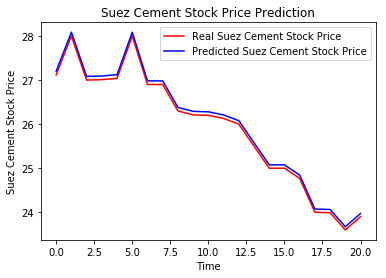

In [29]:
plt.plot(real_stock_price,color='red',label='Real Suez Cement Stock Price')
plt.plot(predicted_stock_prices,color='blue',label='Predicted Suez Cement Stock Price')
plt.title('Suez Cement Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Suez Cement Stock Price')
plt.legend()
plt.show()

In [30]:
import math
from sklearn.metrics import mean_squared_error

In [31]:
rmse=math.sqrt(mean_squared_error(real_stock_price,predicted_stock_prices))
rmse

0.07945071352883448

In [32]:
mse=mean_squared_error(real_stock_price,predicted_stock_prices)
mse

0.0063124158802409219